<a href="https://colab.research.google.com/github/okanbuyuktepe/Apriori-Method/blob/master/Sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
# Option 1 
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type ='post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [0]:
# Option 2
vocab_size = 1000
embedding_dim = 16
max_length = 16
trunc_type ='post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [0]:
# Option 3
vocab_size = 1000
embedding_dim = 32
max_length = 32
trunc_type ='post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [3]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
 -O  /tmp/sarcasm.json

--2020-06-10 14:10:57--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 2607:f8b0:400c:c13::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.07s   

2020-06-10 14:10:57 (80.9 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
with open("/tmp/sarcasm.json", "r") as f:
  datastore = json.load(f)

In [0]:
sentences = []
labels = []
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [0]:
# we will use 20000 samples as training, rest for validation

training_sentences = np.array(sentences[0:training_size])
testing_sentences  = np.array(sentences[training_size:])
training_labels    = np.array(labels[0:training_size])
testing_labels     = np.array(labels[training_size:])

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token= oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded    = pad_sequences(training_sequences, maxlen= max_length, padding = padding_type, truncating= trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded   = pad_sequences(testing_sequences, maxlen= max_length, padding = padding_type, truncating= trunc_type)

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length= max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 32, 32)            32000     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 32,817
Trainable params: 32,817
Non-trainable params: 0
_________________________________________________________________


In [29]:
num_epocs = 10
history = model.fit(training_padded, training_labels, epochs= num_epocs, verbose = 2, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 - 1s - loss: 0.5549 - accuracy: 0.7035 - val_loss: 0.4221 - val_accuracy: 0.8083
Epoch 2/10
625/625 - 1s - loss: 0.3860 - accuracy: 0.8223 - val_loss: 0.4011 - val_accuracy: 0.8120
Epoch 3/10
625/625 - 1s - loss: 0.3665 - accuracy: 0.8314 - val_loss: 0.3995 - val_accuracy: 0.8165
Epoch 4/10
625/625 - 1s - loss: 0.3584 - accuracy: 0.8372 - val_loss: 0.4005 - val_accuracy: 0.8120
Epoch 5/10
625/625 - 1s - loss: 0.3546 - accuracy: 0.8397 - val_loss: 0.4019 - val_accuracy: 0.8122
Epoch 6/10
625/625 - 1s - loss: 0.3526 - accuracy: 0.8401 - val_loss: 0.4057 - val_accuracy: 0.8135
Epoch 7/10
625/625 - 1s - loss: 0.3521 - accuracy: 0.8399 - val_loss: 0.4054 - val_accuracy: 0.8143
Epoch 8/10
625/625 - 1s - loss: 0.3514 - accuracy: 0.8407 - val_loss: 0.4068 - val_accuracy: 0.8146
Epoch 9/10
625/625 - 1s - loss: 0.3506 - accuracy: 0.8402 - val_loss: 0.4068 - val_accuracy: 0.8149
Epoch 10/10
625/625 - 1s - loss: 0.3491 - accuracy: 0.8421 - val_loss: 0.4073 - val_accuracy: 0.8131

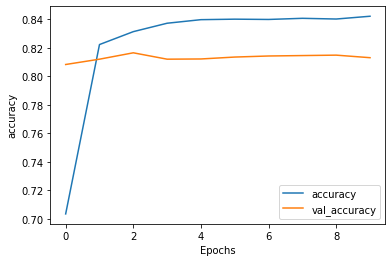

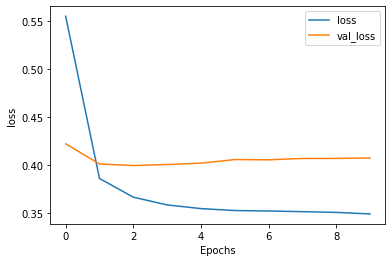

In [30]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()


plot_graphs(history, str("accuracy"))
plot_graphs(history, 'loss')

In [33]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store <OOV> <OOV> over secret <OOV> <OOV> for <OOV> <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [34]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(1000, 32)


In [31]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.3939635]
 [0.692113 ]]


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')